# Modeling

## Libraries

In [14]:
import pandas as pd
import numpy as np
from sklearn import linear_model
#from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import r2_score
import pickle
import datetime

## Our Data - 2017 to predict 2018

In [5]:
with open("2017.p", "rb") as iFile:
    train = pickle.load(iFile)

In [6]:
with open("2018.p", "rb") as iFile:
    test = pickle.load(iFile)

In [7]:
train['Month'] = pd.DatetimeIndex(train.Date).month
test['Month'] = pd.DatetimeIndex(test.Date).month
test['Season'] = test['Month'].apply(lambda x: 'Spring' if x >= 3 and x <= 5 else 'Summer' if x >=6 and x <=8 else 'Fall' if x>=9 and x<=11 else 'Winter')
train['Season'] = train['Month'].apply(lambda x: 'Spring' if x >= 3 and x <= 5 else 'Summer' if x >=6 and x <=8 else 'Fall' if x>=9 and x<=11 else 'Winter')

In [8]:
train.head()

,Area,Date,DayOfWeek,Hour,Minute,OccupiedPercent,Month,Season
0,8TH. ST,2017-01-01,6,0,0,0.632143,1,Winter
1,8TH. ST,2017-01-01,6,1,0,0.673810,1,Winter
2,8TH. ST,2017-01-01,6,2,0,0.475000,1,Winter
3,8TH. ST,2017-01-01,6,3,0,0.266667,1,Winter
4,8TH. ST,2017-01-01,6,4,0,0.225000,1,Winter


## Using Area, DayOfWeek, Hour, and Month

In [9]:
t_mod = smf.ols('OccupiedPercent ~ Area + DayOfWeek + Hour + Month', data=train).fit()

In [10]:
t_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        OccupiedPercent   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                 1.162e+04
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:53:44   Log-Likelihood:                 90736.
No. Observations:              744600   AIC:                        -1.812e+05
Df Residuals:                  744485   BIC:                        -1.799e+05
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.2327      0.003     86.477      0.000       0.227       0.238
Area[T.BANNOCK ST. N]                0.1852      0.003     57.201      0.000       0.179       0.192
Area[T.BANNOCK ST. S]                0.1560      0.003     48.186      0.000       0.150       0.162
Area[T.CAP.ST]                      -0.2936      0.003    -90.710      0.000      -0.300      -0.287
Area[T.E. 10TH MAIN-IDAHO]           0.1806      0.003     55.787      0.000       0.174       0.187
Area[T.E. 5TH GROVE-MAIN]            0.0267      0.003      8.248      0.000       0.020       0.033
Area[T.E. 6TH GROVE/MAIN]            0.1400      0.003     43.245      0.000       0.134       0.146
Area[T.E. 6TH IDAHO-BANNOCK]         0.0706      0.003     21.806      0.000       0.064       0.077
Area[T.E. 6TH MAIN-IDAHO]            0.1143      0.003     35.320      0.000       0.108       0.121
Area[T.E. 8TH FULTON/MYRTLE]         0.1352      0.003     41.779      0.000       0.129       0.142
Area[T.E. 8TH MYRTLE/BROAD]          0.0148      0.003      4.559      0.000       0.008       0.021
Area[T.E. 9TH GROVE-MAIN]            0.0343      0.003     10.609      0.000       0.028       0.041
Area[T.E. 9TH IDAHO-BANNOCK]         0.1238      0.003     38.257      0.000       0.117       0.130
Area[T.E. 9TH MAIN-IDAHO]            0.0883      0.003     27.263      0.000       0.082       0.095
Area[T.E.10TH BANNOCK-JEFFERSON]     0.0320      0.003      9.897      0.000       0.026       0.038
Area[T.E.10TH IDAHO-BANNOCK]         0.1133      0.003     35.005      0.000       0.107       0.120
Area[T.E.2ND MYRTLE-FRONT]          -0.0530      0.003    -16.385      0.000      -0.059      -0.047
Area[T.E.5TH IDAHO-BANNOCK]          0.0433      0.003     13.364      0.000       0.037       0.050
Area[T.E.6TH BANNOCK-JEFFERSON]     -0.0730      0.003    -22.538      0.000      -0.079      -0.067
Area[T.E.8TH BAN/JEFF]               0.1170      0.003     36.135      0.000       0.111       0.123
Area[T.E.8TH JEFF/STATE]             0.0594      0.003     18.353      0.000       0.053       0.066
Area[T.E.8th St. Broad/Front]        0.1674      0.003     51.712      0.000       0.161       0.174
Area[T.E.9TH BAN/JEF]                0.0771      0.003     23.824      0.000       0.071       0.083
Area[T.E.9TH JEFFERSON-STATE]        0.0219      0.003      6.774      0.000       0.016       0.028
Area[T.N. BANNOCK 6TH-CAPITOL]       0.0465      0.003     14.364      0.000       0.040       0.053
Area[T.N. GROVE 5-6TH]               0.1345      0.003     41.558      0.000       0.128       0.141
Area[T.N. IDAHO 5-6TH]               0.1117      0.003     34.520      0.000       0.105       0.118
Area[T.N. Idaho 8-9th]               0.1822      0.00

In [11]:
test['PredOccupency'] = t_mod.predict(test)
test['Error'] = test['OccupiedPercent'] - test['PredOccupency']
test['Error'].mean()

-0.03381297892429408

In [12]:
print("r2_score",r2_score(test['OccupiedPercent'],test['PredOccupency']))

r2_score 0.5682506760317458


#### Average occupency by hour over the month of January

In [15]:
df1 = test[(test['Date']>=datetime.date(2018,1,1)) & (test['Date']<=datetime.date(2018,1,30))]
#df1 = test[(test['Area']=='8TH. ST') & (test['Date']>=datetime.date(2018,10,1)) & (test['Date']<=datetime.date(2018,10,30))]
#df1 = df1.reset_index()
#df1 = df1[['OccupiedPercent', 'PredOccupency']]
df1 = df1.groupby('Hour')['OccupiedPercent','PredOccupency'].mean()

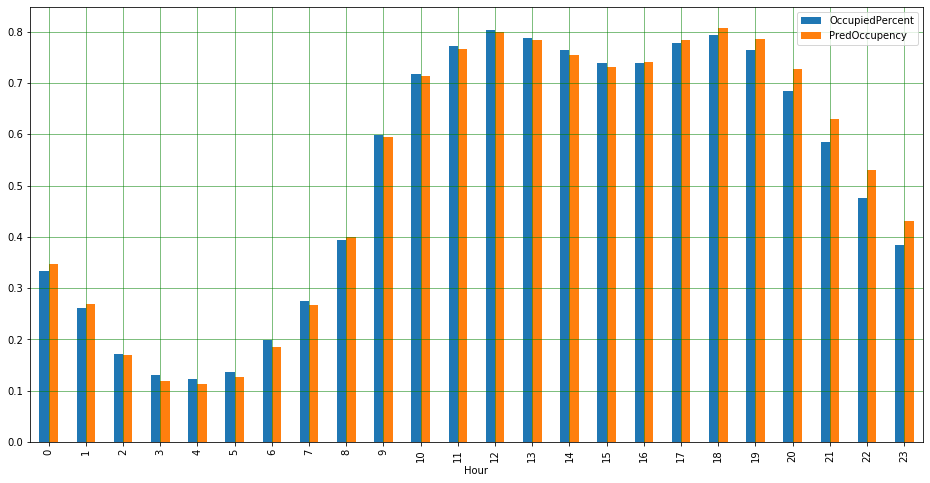

In [16]:
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Using Area, DayOfWeek, Hour, and Season

In [446]:
t_mod = smf.ols('OccupiedPercent ~ Area + DayOfWeek + Hour + Season', data=train).fit()

In [447]:
t_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        OccupiedPercent   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                 1.146e+04
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:11:14   Log-Likelihood:                 91692.
No. Observations:              744600   AIC:                        -1.832e+05
Df Residuals:                  744483   BIC:                        -1.818e+05
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.2293      0.003     85.475      0.000       0.224       0.235
Area[T.BANNOCK ST. N]                0.1852      0.003     57.274      0.000       0.179       0.191
Area[T.BANNOCK ST. S]                0.1560      0.003     48.248      0.000       0.150       0.162
Area[T.CAP.ST]                      -0.2936      0.003    -90.827      0.000      -0.300      -0.287
Area[T.E. 10TH MAIN-IDAHO]           0.1806      0.003     55.859      0.000       0.174       0.187
Area[T.E. 5TH GROVE-MAIN]            0.0267      0.003      8.259      0.000       0.020       0.033
Area[T.E. 6TH GROVE/MAIN]            0.1400      0.003     43.300      0.000       0.134       0.146
Area[T.E. 6TH IDAHO-BANNOCK]         0.0706      0.003     21.834      0.000       0.064       0.077
Area[T.E. 6TH MAIN-IDAHO]            0.1143      0.003     35.365      0.000       0.108       0.121
Area[T.E. 8TH FULTON/MYRTLE]         0.1352      0.003     41.832      0.000       0.129       0.142
Area[T.E. 8TH MYRTLE/BROAD]          0.0148      0.003      4.565      0.000       0.008       0.021
Area[T.E. 9TH GROVE-MAIN]            0.0343      0.003     10.623      0.000       0.028       0.041
Area[T.E. 9TH IDAHO-BANNOCK]         0.1238      0.003     38.306      0.000       0.117       0.130
Area[T.E. 9TH MAIN-IDAHO]            0.0883      0.003     27.298      0.000       0.082       0.095
Area[T.E.10TH BANNOCK-JEFFERSON]     0.0320      0.003      9.909      0.000       0.026       0.038
Area[T.E.10TH IDAHO-BANNOCK]         0.1133      0.003     35.050      0.000       0.107       0.120
Area[T.E.2ND MYRTLE-FRONT]          -0.0530      0.003    -16.406      0.000      -0.059      -0.047
Area[T.E.5TH IDAHO-BANNOCK]          0.0433      0.003     13.382      0.000       0.037       0.050
Area[T.E.6TH BANNOCK-JEFFERSON]     -0.0730      0.003    -22.567      0.000      -0.079      -0.067
Area[T.E.8TH BAN/JEFF]               0.1170      0.003     36.181      0.000       0.111       0.123
Area[T.E.8TH JEFF/STATE]             0.0594      0.003     18.377      0.000       0.053       0.066
Area[T.E.8th St. Broad/Front]        0.1674      0.003     51.778      0.000       0.161       0.174
Area[T.E.9TH BAN/JEF]                0.0771      0.003     23.855      0.000       0.071       0.083
Area[T.E.9TH JEFFERSON-STATE]        0.0219      0.003      6.783      0.000       0.016       0.028
Area[T.N. BANNOCK 6TH-CAPITOL]       0.0465      0.003     14.383      0.000       0.040       0.053
Area[T.N. GROVE 5-6TH]               0.1345      0.003     41.612      0.000       0.128       0.141
Area[T.N. IDAHO 5-6TH]               0.1117      0.003     34.564      0.000       0.105       0.118
Area[T.N. Idaho 8-9th]               0.1822      0.00

In [448]:
test['PredOccupency'] = t_mod.predict(test)
test['Error'] = test['OccupiedPercent'] - test['PredOccupency']
test['Error'].mean()

-0.03381219048522054

In [449]:
print("r2_score",r2_score(test['OccupiedPercent'],test['PredOccupency']))

r2_score 0.5656622075101925


#### Average occupency by hour over the month of January

In [450]:
df1 = test[(test['Date']>=datetime.date(2018,1,1)) & (test['Date']<=datetime.date(2018,1,30))]
#df1 = test[(test['Area']=='8TH. ST') & (test['Date']>=datetime.date(2018,10,1)) & (test['Date']<=datetime.date(2018,10,30))]
#df1 = df1.reset_index()
#df1 = df1[['OccupiedPercent', 'PredOccupency']]
df1 = df1.groupby('Hour')['OccupiedPercent','PredOccupency'].mean()

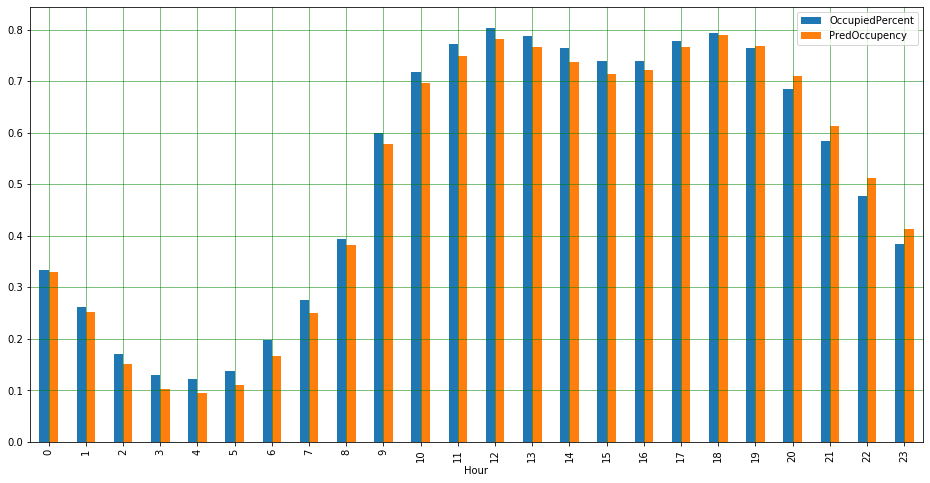

In [451]:
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Using Area, DayOfWeek and Hour

In [471]:
t_mod = smf.ols('OccupiedPercent ~ Area + DayOfWeek + Hour', data=train).fit()

In [472]:
t_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        OccupiedPercent   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:20:49   Log-Likelihood:                 90730.
No. Observations:              744600   AIC:                        -1.812e+05
Df Residuals:                  744486   BIC:                        -1.799e+05
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.2311      0.003     87.176      0.000       0.226       0.236
Area[T.BANNOCK ST. N]                0.1852      0.003     57.200      0.000       0.179       0.192
Area[T.BANNOCK ST. S]                0.1560      0.003     48.186      0.000       0.150       0.162
Area[T.CAP.ST]                      -0.2936      0.003    -90.710      0.000      -0.300      -0.287
Area[T.E. 10TH MAIN-IDAHO]           0.1806      0.003     55.787      0.000       0.174       0.187
Area[T.E. 5TH GROVE-MAIN]            0.0267      0.003      8.248      0.000       0.020       0.033
Area[T.E. 6TH GROVE/MAIN]            0.1400      0.003     43.244      0.000       0.134       0.146
Area[T.E. 6TH IDAHO-BANNOCK]         0.0706      0.003     21.806      0.000       0.064       0.077
Area[T.E. 6TH MAIN-IDAHO]            0.1143      0.003     35.319      0.000       0.108       0.121
Area[T.E. 8TH FULTON/MYRTLE]         0.1352      0.003     41.779      0.000       0.129       0.142
Area[T.E. 8TH MYRTLE/BROAD]          0.0148      0.003      4.559      0.000       0.008       0.021
Area[T.E. 9TH GROVE-MAIN]            0.0343      0.003     10.609      0.000       0.028       0.041
Area[T.E. 9TH IDAHO-BANNOCK]         0.1238      0.003     38.257      0.000       0.117       0.130
Area[T.E. 9TH MAIN-IDAHO]            0.0883      0.003     27.263      0.000       0.082       0.095
Area[T.E.10TH BANNOCK-JEFFERSON]     0.0320      0.003      9.897      0.000       0.026       0.038
Area[T.E.10TH IDAHO-BANNOCK]         0.1133      0.003     35.004      0.000       0.107       0.120
Area[T.E.2ND MYRTLE-FRONT]          -0.0530      0.003    -16.384      0.000      -0.059      -0.047
Area[T.E.5TH IDAHO-BANNOCK]          0.0433      0.003     13.364      0.000       0.037       0.050
Area[T.E.6TH BANNOCK-JEFFERSON]     -0.0730      0.003    -22.538      0.000      -0.079      -0.067
Area[T.E.8TH BAN/JEFF]               0.1170      0.003     36.135      0.000       0.111       0.123
Area[T.E.8TH JEFF/STATE]             0.0594      0.003     18.353      0.000       0.053       0.066
Area[T.E.8th St. Broad/Front]        0.1674      0.003     51.711      0.000       0.161       0.174
Area[T.E.9TH BAN/JEF]                0.0771      0.003     23.824      0.000       0.071       0.083
Area[T.E.9TH JEFFERSON-STATE]        0.0219      0.003      6.774      0.000       0.016       0.028
Area[T.N. BANNOCK 6TH-CAPITOL]       0.0465      0.003     14.364      0.000       0.040       0.053
Area[T.N. GROVE 5-6TH]               0.1345      0.003     41.558      0.000       0.128       0.141
Area[T.N. IDAHO 5-6TH]               0.1117      0.003     34.520      0.000       0.105       0.118
Area[T.N. Idaho 8-9th]               0.1822      0.00

In [473]:
test['PredOccupency'] = t_mod.predict(test)
test['Error'] = test['OccupiedPercent'] - test['PredOccupency']
test['Error'].mean()

-0.03381303850043315

In [474]:
print("r2_score",r2_score(test['OccupiedPercent'],test['PredOccupency']))

r2_score 0.5681908427726576


#### Average occupency by hour over the month of January

In [475]:
df1 = test[(test['Date']>=datetime.date(2018,1,1)) & (test['Date']<=datetime.date(2018,1,30))]
#df1 = test[(test['Area']=='8TH. ST') & (test['Date']>=datetime.date(2018,10,1)) & (test['Date']<=datetime.date(2018,10,30))]
#df1 = df1.reset_index()
#df1 = df1[['OccupiedPercent', 'PredOccupency']]
df1 = df1.groupby('Hour')['OccupiedPercent','PredOccupency'].mean()

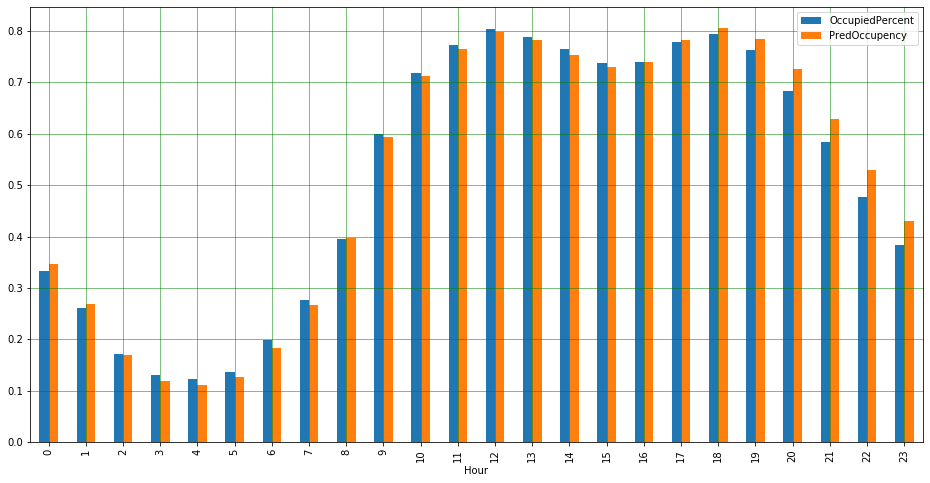

In [476]:
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Using Area and Hour

In [478]:
t_mod = smf.ols('OccupiedPercent ~ Area + Hour', data=train).fit()

In [479]:
t_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        OccupiedPercent   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                 1.160e+04
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:21:32   Log-Likelihood:                 75534.
No. Observations:              744600   AIC:                        -1.509e+05
Df Residuals:                  744492   BIC:                        -1.496e+05
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.2957      0.003    112.280      0.000       0.290       0.301
Area[T.BANNOCK ST. N]                0.1852      0.003     56.045      0.000       0.179       0.192
Area[T.BANNOCK ST. S]                0.1560      0.003     47.212      0.000       0.150       0.162
Area[T.CAP.ST]                      -0.2936      0.003    -88.878      0.000      -0.300      -0.287
Area[T.E. 10TH MAIN-IDAHO]           0.1806      0.003     54.660      0.000       0.174       0.187
Area[T.E. 5TH GROVE-MAIN]            0.0267      0.003      8.081      0.000       0.020       0.033
Area[T.E. 6TH GROVE/MAIN]            0.1400      0.003     42.371      0.000       0.134       0.146
Area[T.E. 6TH IDAHO-BANNOCK]         0.0706      0.003     21.365      0.000       0.064       0.077
Area[T.E. 6TH MAIN-IDAHO]            0.1143      0.003     34.606      0.000       0.108       0.121
Area[T.E. 8TH FULTON/MYRTLE]         0.1352      0.003     40.935      0.000       0.129       0.142
Area[T.E. 8TH MYRTLE/BROAD]          0.0148      0.003      4.467      0.000       0.008       0.021
Area[T.E. 9TH GROVE-MAIN]            0.0343      0.003     10.395      0.000       0.028       0.041
Area[T.E. 9TH IDAHO-BANNOCK]         0.1238      0.003     37.484      0.000       0.117       0.130
Area[T.E. 9TH MAIN-IDAHO]            0.0883      0.003     26.713      0.000       0.082       0.095
Area[T.E.10TH BANNOCK-JEFFERSON]     0.0320      0.003      9.697      0.000       0.026       0.039
Area[T.E.10TH IDAHO-BANNOCK]         0.1133      0.003     34.297      0.000       0.107       0.120
Area[T.E.2ND MYRTLE-FRONT]          -0.0530      0.003    -16.054      0.000      -0.060      -0.047
Area[T.E.5TH IDAHO-BANNOCK]          0.0433      0.003     13.094      0.000       0.037       0.050
Area[T.E.6TH BANNOCK-JEFFERSON]     -0.0730      0.003    -22.083      0.000      -0.079      -0.066
Area[T.E.8TH BAN/JEFF]               0.1170      0.003     35.405      0.000       0.110       0.123
Area[T.E.8TH JEFF/STATE]             0.0594      0.003     17.982      0.000       0.053       0.066
Area[T.E.8th St. Broad/Front]        0.1674      0.003     50.667      0.000       0.161       0.174
Area[T.E.9TH BAN/JEF]                0.0771      0.003     23.343      0.000       0.071       0.084
Area[T.E.9TH JEFFERSON-STATE]        0.0219      0.003      6.637      0.000       0.015       0.028
Area[T.N. BANNOCK 6TH-CAPITOL]       0.0465      0.003     14.074      0.000       0.040       0.053
Area[T.N. GROVE 5-6TH]               0.1345      0.003     40.719      0.000       0.128       0.141
Area[T.N. IDAHO 5-6TH]               0.1117      0.003     33.823      0.000       0.105       0.118
Area[T.N. Idaho 8-9th]               0.1822      0.00

In [480]:
test['PredOccupency'] = t_mod.predict(test)
test['Error'] = test['OccupiedPercent'] - test['PredOccupency']
test['Error'].mean()

-0.03396730365924856

In [481]:
print("r2_score",r2_score(test['OccupiedPercent'],test['PredOccupency']))

r2_score 0.561848440654791


#### Average occupency by hour over the month of January

In [482]:
df1 = test[(test['Date']>=datetime.date(2018,1,1)) & (test['Date']<=datetime.date(2018,1,30))]
#df1 = test[(test['Area']=='8TH. ST') & (test['Date']>=datetime.date(2018,10,1)) & (test['Date']<=datetime.date(2018,10,30))]
#df1 = df1.reset_index()
#df1 = df1[['OccupiedPercent', 'PredOccupency']]
df1 = df1.groupby('Hour')['OccupiedPercent','PredOccupency'].mean()

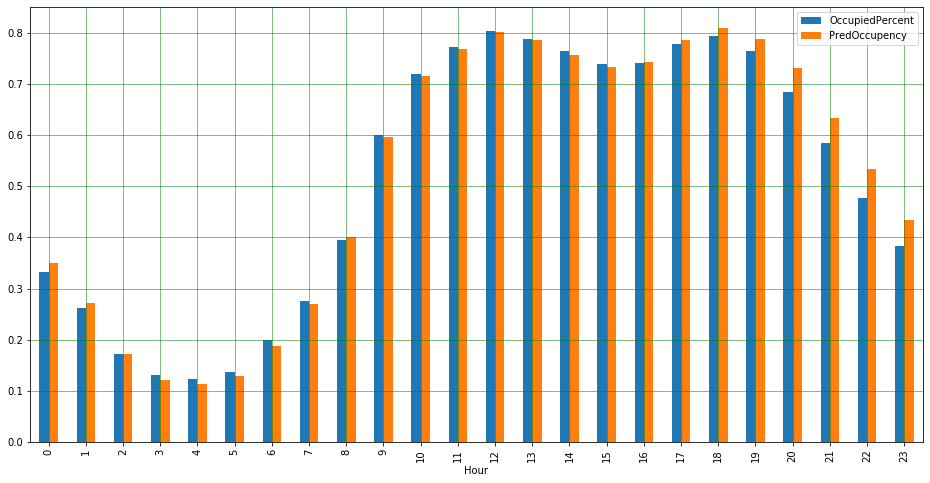

In [483]:
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Using Hour

In [485]:
t_mod = smf.ols('OccupiedPercent ~ Hour', data=train).fit()

In [486]:
t_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        OccupiedPercent   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                 3.418e+04
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:21:49   Log-Likelihood:                -21433.
No. Observations:              744600   AIC:                         4.291e+04
Df Residuals:                  744576   BIC:                         4.319e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3498      0.001    247.424      0.000       0.347       0.353
Hour[T.1]     -0.0785      0.002    -39.273      0.000      -0.082      -0.075
Hour[T.2]     -0.1779      0.002    -88.950      0.000      -0.182      -0.174
Hour[T.3]     -0.2283      0.002   -114.152      0.000      -0.232      -0.224
Hour[T.4]     -0.2354      0.002   -117.745      0.000      -0.239      -0.232
Hour[T.5]     -0.2204      0.002   -110.237      0.000      -0.224      -0.217
Hour[T.6]     -0.1627      0.002    -81.388      0.000      -0.167      -0.159
Hour[T.7]     -0.0803      0.002    -40.136      0.000      -0.084      -0.076
Hour[T.8]      0.0512      0.002     25.618      0.000       0.047       0.055
Hour[T.9]      0.2472      0.002    123.633      0.000       0.243       0.251
Hour[T.10]     0.3664      0.002    183.224      0.000       0.362       0.370
Hour[T.11]     0.4177      0.002    208.914      0.000       0.414       0.422
Hour[T.12]     0.4519      0.002    226.000      0.000       0.448       0.456
Hour[T.13]     0.4361      0.002    218.089      0.000       0.432       0.440
Hour[T.14]     0.4068      0.002    203.448      0.000       0.403       0.411
Hour[T.15]     0.3833      0.002    191.681      0.000       0.379       0.387
Hour[T.16]     0.3921      0.002    196.108      0.000       0.388       0.396
Hour[T.17]     0.4358      0.002    217.956      0.000       0.432       0.440
Hour[T.18]     0.4595      0.002    229.789      0.000       0.456       0.463
Hour[T.19]     0.4380      0.002    219.054      0.000       0.434       0.442
Hour[T.20]     0.3802      0.002    190.169      0.000       0.376       0.384
Hour[T.21]     0.2826      0.002    141.310      0.000       0.279       0.286
Hour[T.22]     0.1828      0.002     91.400      0.000       0.179       0.187
Hour[T.23]     0.0831      0.002     41.580      0.000       0.079       0.087
==============================================================================
Omnibus:                    46337.277   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65013.185
Skew:                          -0.553   Prob(JB):                         0.00
Kurtosis:                       3.933   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [487]:
test['PredOccupency'] = t_mod.predict(test)
test['Error'] = test['OccupiedPercent'] - test['PredOccupency']
test['Error'].mean()

-0.03396730365928891

In [488]:
print("r2_score",r2_score(test['OccupiedPercent'],test['PredOccupency']))

r2_score 0.46225530285197747


#### Average occupency by hour over the month of January

In [489]:
df1 = test[(test['Date']>=datetime.date(2018,1,1)) & (test['Date']<=datetime.date(2018,1,30))]
#df1 = test[(test['Area']=='8TH. ST') & (test['Date']>=datetime.date(2018,10,1)) & (test['Date']<=datetime.date(2018,10,30))]
#df1 = df1.reset_index()
#df1 = df1[['OccupiedPercent', 'PredOccupency']]
df1 = df1.groupby('Hour')['OccupiedPercent','PredOccupency'].mean()

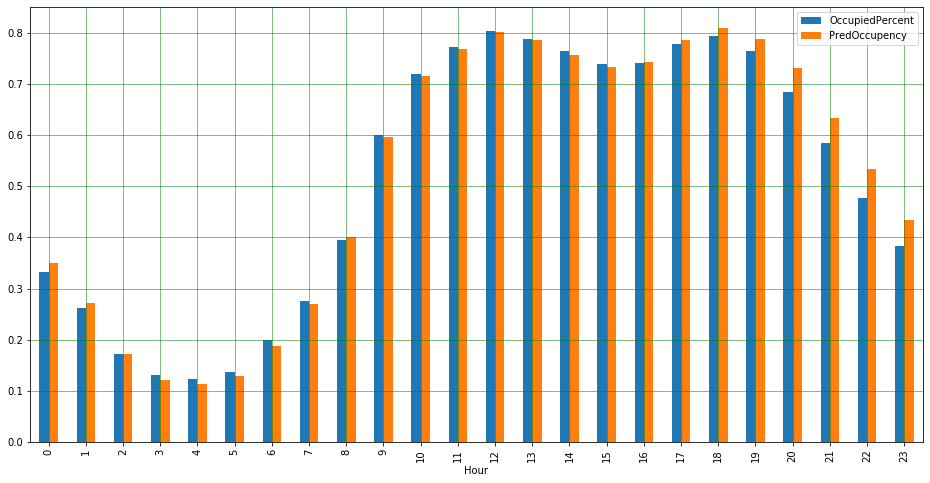

In [490]:
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

From these results it's clear that Area, DayOfWeek, and Month all help improve performance on our test data.

## What if we group up hours into portions of the day?

In [491]:
test['DayPortion'] = test['Hour'].apply(lambda x: '1' if x >= 0 and x <= 2  else '2' if x >= 3 and x <= 6 else '3' if x >= 7 and x <=9 else '4' if x>=10 and x<=12 else '5' if x>=13 and x<= 15 else '6' if x >=16 and x<=18 else '7' if x>=19 and x<=20 else '8')
train['DayPortion'] = train['Hour'].apply(lambda x: '1' if x >= 0 and x <= 2  else '2' if x >= 3 and x <= 6 else '3' if x >= 7 and x <=9 else '4' if x>=10 and x<=12 else '5' if x>=13 and x<= 15 else '6' if x >=16 and x<=18 else '7' if x>=19 and x<=20 else '8')

In [493]:
train.head()

,Area,Date,DayOfWeek,Hour,Minute,OccupiedPercent,Month,Season,DayPortion
0,8TH. ST,2017-01-01,6,0,0,0.632143,1,Winter,1
1,8TH. ST,2017-01-01,6,1,0,0.673810,1,Winter,1
2,8TH. ST,2017-01-01,6,2,0,0.475000,1,Winter,1
3,8TH. ST,2017-01-01,6,3,0,0.266667,1,Winter,2
4,8TH. ST,2017-01-01,6,4,0,0.225000,1,Winter,2


In [496]:
t_mod = smf.ols('OccupiedPercent ~ Area + DayPortion + DayOfWeek + Month', data=train).fit()

In [497]:
t_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        OccupiedPercent   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                 1.171e+04
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:28:02   Log-Likelihood:                 57603.
No. Observations:              744600   AIC:                        -1.150e+05
Df Residuals:                  744501   BIC:                        -1.139e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.1473      0.003     56.314      0.000       0.142       0.152
Area[T.BANNOCK ST. N]                0.1852      0.003     54.712      0.000       0.179       0.192
Area[T.BANNOCK ST. S]                0.1560      0.003     46.089      0.000       0.149       0.163
Area[T.CAP.ST]                      -0.2936      0.003    -86.763      0.000      -0.300      -0.287
Area[T.E. 10TH MAIN-IDAHO]           0.1806      0.003     53.360      0.000       0.174       0.187
Area[T.E. 5TH GROVE-MAIN]            0.0267      0.003      7.889      0.000       0.020       0.033
Area[T.E. 6TH GROVE/MAIN]            0.1400      0.003     41.363      0.000       0.133       0.147
Area[T.E. 6TH IDAHO-BANNOCK]         0.0706      0.003     20.857      0.000       0.064       0.077
Area[T.E. 6TH MAIN-IDAHO]            0.1143      0.003     33.783      0.000       0.108       0.121
Area[T.E. 8TH FULTON/MYRTLE]         0.1352      0.003     39.961      0.000       0.129       0.142
Area[T.E. 8TH MYRTLE/BROAD]          0.0148      0.003      4.361      0.000       0.008       0.021
Area[T.E. 9TH GROVE-MAIN]            0.0343      0.003     10.148      0.000       0.028       0.041
Area[T.E. 9TH IDAHO-BANNOCK]         0.1238      0.003     36.592      0.000       0.117       0.130
Area[T.E. 9TH MAIN-IDAHO]            0.0883      0.003     26.077      0.000       0.082       0.095
Area[T.E.10TH BANNOCK-JEFFERSON]     0.0320      0.003      9.466      0.000       0.025       0.039
Area[T.E.10TH IDAHO-BANNOCK]         0.1133      0.003     33.481      0.000       0.107       0.120
Area[T.E.2ND MYRTLE-FRONT]          -0.0530      0.003    -15.672      0.000      -0.060      -0.046
Area[T.E.5TH IDAHO-BANNOCK]          0.0433      0.003     12.783      0.000       0.037       0.050
Area[T.E.6TH BANNOCK-JEFFERSON]     -0.0730      0.003    -21.558      0.000      -0.080      -0.066
Area[T.E.8TH BAN/JEFF]               0.1170      0.003     34.563      0.000       0.110       0.124
Area[T.E.8TH JEFF/STATE]             0.0594      0.003     17.555      0.000       0.053       0.066
Area[T.E.8th St. Broad/Front]        0.1674      0.003     49.462      0.000       0.161       0.174
Area[T.E.9TH BAN/JEF]                0.0771      0.003     22.787      0.000       0.070       0.084
Area[T.E.9TH JEFFERSON-STATE]        0.0219      0.003      6.479      0.000       0.015       0.029
Area[T.N. BANNOCK 6TH-CAPITOL]       0.0465      0.003     13.739      0.000       0.040       0.053
Area[T.N. GROVE 5-6TH]               0.1345      0.003     39.750      0.000       0.128       0.141
Area[T.N. IDAHO 5-6TH]               0.1117      0.003     33.018      0.000       0.105       0.118
Area[T.N. Idaho 8-9th]               0.1822      0.00

In [498]:
test['PredOccupency'] = t_mod.predict(test)
test['Error'] = test['OccupiedPercent'] - test['PredOccupency']
test['Error'].mean()

-0.03381297892427794

In [499]:
print("r2_score",r2_score(test['OccupiedPercent'],test['PredOccupency']))

r2_score 0.5371356265934524


#### Average occupency by hour over the month of January

In [500]:
df1 = test[(test['Date']>=datetime.date(2018,1,1)) & (test['Date']<=datetime.date(2018,1,30))]
#df1 = test[(test['Area']=='8TH. ST') & (test['Date']>=datetime.date(2018,10,1)) & (test['Date']<=datetime.date(2018,10,30))]
#df1 = df1.reset_index()
#df1 = df1[['OccupiedPercent', 'PredOccupency']]
df1 = df1.groupby('Hour')['OccupiedPercent','PredOccupency'].mean()

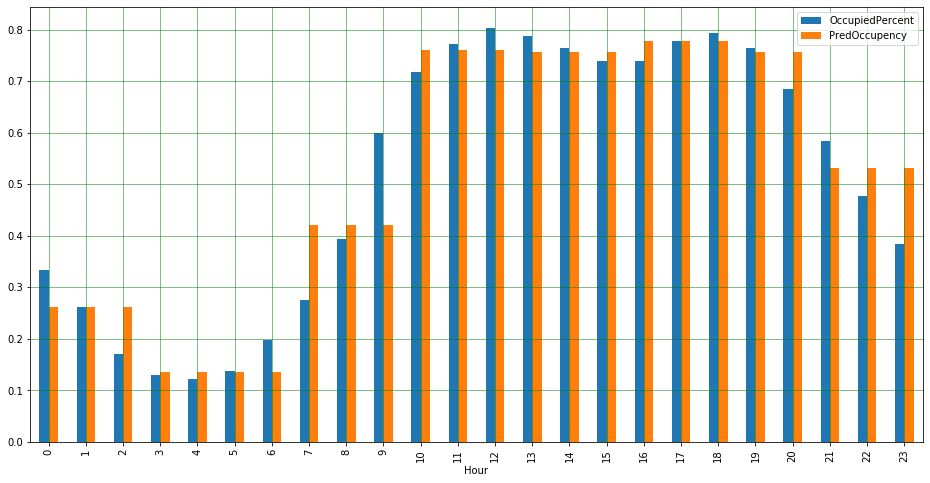

In [501]:
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### This performed worst, but we are predicting each hour using the DayPortion. What if we modified our data and took the average of each DayPortion and tried to predict that?

In [504]:
test2 = test.groupby(['Date','Area','DayOfWeek','Month','DayPortion', ])['OccupiedPercent'].mean().to_frame()
train2 = train.groupby(['Date','Area','DayOfWeek','Month','DayPortion', ])['OccupiedPercent'].mean().to_frame()
train2 = train2.reset_index()
test2 = test2.reset_index()
train2.head()

,Date,Area,DayOfWeek,Month,DayPortion,OccupiedPercent
0,2017-01-01,8TH. ST,6,1,1,0.593651
1,2017-01-01,8TH. ST,6,1,2,0.173810
2,2017-01-01,8TH. ST,6,1,3,0.539286
3,2017-01-01,8TH. ST,6,1,4,0.692063
4,2017-01-01,8TH. ST,6,1,5,0.680556


In [505]:
t_mod = smf.ols('OccupiedPercent ~ Area + DayPortion + DayOfWeek + Month', data=train2).fit()

In [506]:
t_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        OccupiedPercent   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     4880.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:39:03   Log-Likelihood:                 47853.
No. Observations:              248200   AIC:                        -9.552e+04
Df Residuals:                  248106   BIC:                        -9.454e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.1602      0.004     40.441      0.000       0.152       0.168
Area[T.BANNOCK ST. N]                0.1956      0.005     37.453      0.000       0.185       0.206
Area[T.BANNOCK ST. S]                0.1639      0.005     31.376      0.000       0.154       0.174
Area[T.CAP.ST]                      -0.3052      0.005    -58.426      0.000      -0.315      -0.295
Area[T.E. 10TH MAIN-IDAHO]           0.1752      0.005     33.550      0.000       0.165       0.185
Area[T.E. 5TH GROVE-MAIN]            0.0322      0.005      6.169      0.000       0.022       0.042
Area[T.E. 6TH GROVE/MAIN]            0.1508      0.005     28.875      0.000       0.141       0.161
Area[T.E. 6TH IDAHO-BANNOCK]         0.0819      0.005     15.684      0.000       0.072       0.092
Area[T.E. 6TH MAIN-IDAHO]            0.1249      0.005     23.914      0.000       0.115       0.135
Area[T.E. 8TH FULTON/MYRTLE]         0.1436      0.005     27.493      0.000       0.133       0.154
Area[T.E. 8TH MYRTLE/BROAD]          0.0172      0.005      3.287      0.001       0.007       0.027
Area[T.E. 9TH GROVE-MAIN]            0.0327      0.005      6.267      0.000       0.022       0.043
Area[T.E. 9TH IDAHO-BANNOCK]         0.1356      0.005     25.968      0.000       0.125       0.146
Area[T.E. 9TH MAIN-IDAHO]            0.0890      0.005     17.038      0.000       0.079       0.099
Area[T.E.10TH BANNOCK-JEFFERSON]     0.0407      0.005      7.783      0.000       0.030       0.051
Area[T.E.10TH IDAHO-BANNOCK]         0.1239      0.005     23.728      0.000       0.114       0.134
Area[T.E.2ND MYRTLE-FRONT]          -0.0636      0.005    -12.180      0.000      -0.074      -0.053
Area[T.E.5TH IDAHO-BANNOCK]          0.0520      0.005      9.951      0.000       0.042       0.062
Area[T.E.6TH BANNOCK-JEFFERSON]     -0.0658      0.005    -12.592      0.000      -0.076      -0.056
Area[T.E.8TH BAN/JEFF]               0.1303      0.005     24.949      0.000       0.120       0.141
Area[T.E.8TH JEFF/STATE]             0.0702      0.005     13.440      0.000       0.060       0.080
Area[T.E.8th St. Broad/Front]        0.1758      0.005     33.659      0.000       0.166       0.186
Area[T.E.9TH BAN/JEF]                0.0891      0.005     17.068      0.000       0.079       0.099
Area[T.E.9TH JEFFERSON-STATE]        0.0264      0.005      5.046      0.000       0.016       0.037
Area[T.N. BANNOCK 6TH-CAPITOL]       0.0581      0.005     11.119      0.000       0.048       0.068
Area[T.N. GROVE 5-6TH]               0.1462      0.005     27.983      0.000       0.136       0.156
Area[T.N. IDAHO 5-6TH]               0.1217      0.005     23.297      0.000       0.111       0.132
Area[T.N. Idaho 8-9th]               0.1942      0.00

In [507]:
test2['PredOccupency'] = t_mod.predict(test2)
test2['Error'] = test2['OccupiedPercent'] - test2['PredOccupency']
test2['Error'].mean()

-0.035518919624125615

In [508]:
print("r2_score",r2_score(test2['OccupiedPercent'],test2['PredOccupency']))

r2_score 0.5703548569793704


#### Average occupency by hour over the month of January

In [510]:
df1 = test2[(test2['Date']>=datetime.date(2018,1,1)) & (test2['Date']<=datetime.date(2018,1,30))]
#df1 = test2[(test['Area']=='8TH. ST') & (test2['Date']>=datetime.date(2018,10,1)) & (test2['Date']<=datetime.date(2018,10,30))]
#df1 = df1.reset_index()
#df1 = df1[['OccupiedPercent', 'PredOccupency']]
df1 = df1.groupby('DayPortion')['OccupiedPercent','PredOccupency'].mean()

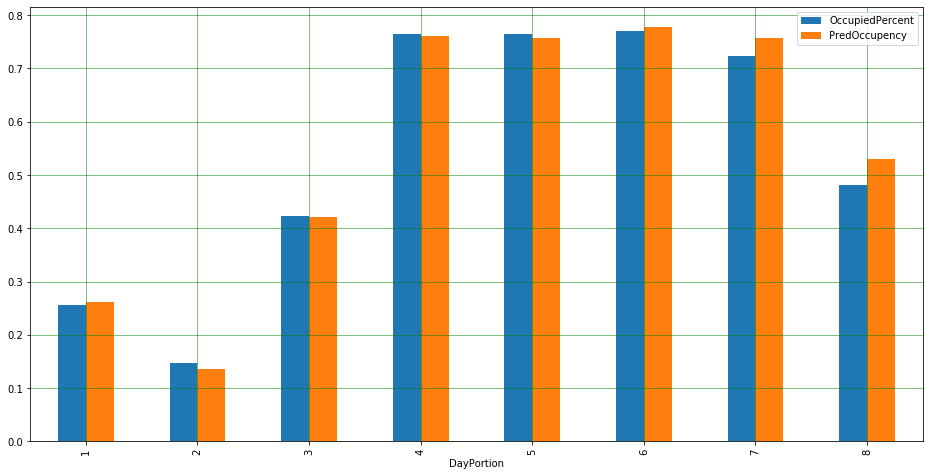

In [511]:
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Our R-Squared Value slightly improved, but we have less information (8 predictions in a day rather than 24)

## Experiment using SciKit Learn's Linear Model

In [519]:
from sklearn.linear_model import LinearRegression

In [513]:
test.head()

,Area,Date,DayOfWeek,Hour,Minute,OccupiedPercent,Month,Season,PredOccupency,Error,DayPortion
0,8TH. ST,2018-01-01,0,0,0,0.596154,1,Winter,0.147015,0.449138,1
1,8TH. ST,2018-01-01,0,1,0,0.589744,1,Winter,0.147015,0.442728,1
2,8TH. ST,2018-01-01,0,2,0,0.507692,1,Winter,0.147015,0.360677,1
3,8TH. ST,2018-01-01,0,3,0,0.370513,1,Winter,0.020765,0.349747,2
4,8TH. ST,2018-01-01,0,4,0,0.155128,1,Winter,0.020765,0.134363,2


In [536]:
X_train = train[['Area','DayOfWeek', 'Hour', 'Month']]
X_test = test[['Area','DayOfWeek','Hour', 'Month']]
y_train = train[['OccupiedPercent']]
y_test = test[['OccupiedPercent']]

Must modify data to be only numbers

In [537]:
dummies = pd.get_dummies(X_train.Area)
X_train = X_train.join(dummies)
dummies = pd.get_dummies(X_train.DayOfWeek)
X_train = X_train.join(dummies, rsuffix='DOW')
dummies = pd.get_dummies(X_train.Hour)
X_train = X_train.join(dummies, rsuffix='Hour')
dummies = pd.get_dummies(X_train.Month)
X_train = X_train.join(dummies, rsuffix='Month')
X_train = X_train.drop(columns=['Area', 'DayOfWeek', 'Hour','Month'])

In [539]:
dummies = pd.get_dummies(X_test.Area)
X_test = X_test.join(dummies)
dummies = pd.get_dummies(X_test.DayOfWeek)
X_test = X_test.join(dummies, rsuffix='DOW')
dummies = pd.get_dummies(X_test.Hour)
X_test = X_test.join(dummies, rsuffix='Hour')
dummies = pd.get_dummies(X_test.Month)
X_test = X_test.join(dummies, rsuffix='Month')
X_test = X_test.drop(columns=['Area', 'DayOfWeek', 'Hour','Month'])

In [540]:
X_train.head()

,8TH. ST,BANNOCK ST. N,BANNOCK ST. S,CAP.ST,E. 10TH MAIN-IDAHO,E. 5TH GROVE-MAIN,E. 6TH GROVE/MAIN,E. 6TH IDAHO-BANNOCK,E. 6TH MAIN-IDAHO,E. 8TH FULTON/MYRTLE,...,3,4,5,6,7Month,8Month,9Month,10Month,11Month,12Month
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [541]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [542]:
predictions = model.predict(X_test)

In [545]:
model.score(X_test, y_test)

0.5633021195476307

In [546]:
r2_score(y_test, predictions)

0.5633021195476307

In [547]:
test['PredOccupency'] = predictions

#### Average occupency by hour over the month of January

In [552]:
df1 = test[(test['Date']>=datetime.date(2018,1,1)) & (test['Date']<=datetime.date(2018,1,30))]
#df1 = test[(test['Area']=='8TH. ST') & (test['Date']>=datetime.date(2018,10,1)) & (test['Date']<=datetime.date(2018,10,30))]
#df1 = df1.reset_index()
#df1 = df1[['OccupiedPercent', 'PredOccupency']]
df1 = df1.groupby('Hour')['OccupiedPercent','PredOccupency'].mean()

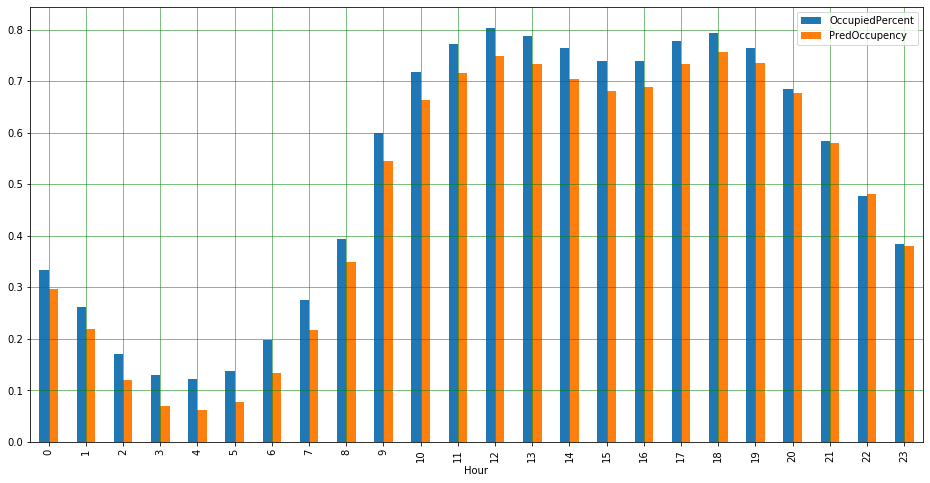

In [553]:
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

This performed worse than the OLS Stats Model